<a href="https://colab.research.google.com/github/lefreakcestchic1971/coviditaly/blob/master/CovidItaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-white')
root = "/content/drive/My Drive/Colab Notebooks/"
datadir = root + "Dataset/"



Costruiamo e visualizziamo un subset del dataset pubblicato dalla Protezione Civile al seguente [link](https://github.com/pcm-dpc/COVID-19/tree/master/dati-regioni) ed aggiornato quotidianamente

In [7]:
covid = pd.read_csv(datadir + "20200330.csv", sep=",", parse_dates=True)
covid = covid.rename(columns={'data': 'date'})
covid = covid[['date', 'denominazione_regione', 'totale_attualmente_positivi', 'dimessi_guariti', 'deceduti', 'totale_casi', 'tamponi']]
covid

date denominazione_regione  ...  totale_casi  tamponi
0    2020-02-24T18:00:00               Abruzzo  ...            0        5
1    2020-02-24T18:00:00            Basilicata  ...            0        0
2    2020-02-24T18:00:00          P.A. Bolzano  ...            0        1
3    2020-02-24T18:00:00              Calabria  ...            0        1
4    2020-02-24T18:00:00              Campania  ...            0       10
..                   ...                   ...  ...          ...      ...
751  2020-03-30T17:00:00               Toscana  ...         4412    30099
752  2020-03-30T17:00:00           P.A. Trento  ...         1682     6377
753  2020-03-30T17:00:00                Umbria  ...         1051     8150
754  2020-03-30T17:00:00         Valle d'Aosta  ...          584     1536
755  2020-03-30T17:00:00                Veneto  ...         8724    99941

[756 rows x 7 columns]

Riorganizziamo il dataframe per esplicitare il numero di positivi e di deceduti per regione e per giorno, nonchè la percentuale di deceduti tra coloro che sono risultati positivi

In [8]:
italy_currently_positive = covid.pivot_table('totale_attualmente_positivi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_currently_positive = italy_currently_positive.fillna(method='ffill')
italy_currently_positive = italy_currently_positive.fillna(0)
italy_currently_positive = italy_currently_positive.iloc[:-1] #remove last row (Italia). If i wanted to remove last column I should do iloc[:, :-1]
italy_currently_positive.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_dead = covid.pivot_table('deceduti', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_dead = italy_dead.fillna(method='ffill')
italy_dead = italy_dead.fillna(0)
italy_dead = italy_dead.iloc[:-1] 
italy_dead.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_total_positive = covid.pivot_table('totale_casi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_total_positive = italy_total_positive.fillna(method='ffill')
italy_total_positive = italy_total_positive.fillna(0)
italy_total_positive = italy_total_positive.iloc[:-1] 
italy_total_positive.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_tested = covid.pivot_table('tamponi', index='date', columns='denominazione_regione', aggfunc='sum', margins=True)
italy_tested = italy_tested.fillna(method='ffill')
italy_tested = italy_tested.fillna(0)
italy_tested = italy_tested.iloc[:-1] 
italy_tested.rename({'All': 'Italia'}, axis=1, inplace=True)
italy_dead_vs_total = italy_dead/italy_total_positive
italy_dead_vs_total = italy_dead_vs_total.fillna(0)
italy_currently_positive

denominazione_regione  Abruzzo  Basilicata  ...  Veneto  Italia
date                                        ...                
2020-02-24T18:00:00          0           0  ...      32     221
2020-02-25T18:00:00          0           0  ...      42     311
2020-02-26T18:00:00          0           0  ...      69     385
2020-02-27T18:00:00          1           0  ...     109     588
2020-02-28T18:00:00          1           0  ...     149     821
2020-02-29T17:00:00          2           0  ...     189    1049
2020-03-01T17:00:00          5           0  ...     261    1577
2020-03-02T18:00:00          5           0  ...     271    1835
2020-03-03T18:00:00          6           1  ...     297    2263
2020-03-04T17:00:00          7           1  ...     345    2706
2020-03-05T17:00:00          8           1  ...     380    3296
2020-03-06T17:00:00          9           3  ...     454    3916
2020-03-07T18:00:00         11           3  ...     505    5061
2020-03-08T18:00:00         17           4  ...     623    6387
2020-03-09T18:00:00         30           5  ...     694    7985
2020-03-10T18:00:00         37           7  ...     783    8514
2020-03-11T17:00:00         37           8  ...     940   10590
2020-03-12T17:00:00         78           8  ...    1297   12839
2020-03-13T17:00:00         83          10  ...    1453   14955
2020-03-14T17:00:00        106          10  ...    1775   17750
2020-03-15T17:00:00        128          11  ...    1989   20603
2020-03-16T17:00:00        165          12  ...    2274   23073
2020-03-17T17:00:00        216          20  ...    2488   26062
2020-03-18T17:00:00        249          27  ...    2953   28710
2020-03-19T17:00:00        366          37  ...    3169   33190
2020-03-20T17:00:00        422          52  ...    3677   37860
2020-03-21T17:00:00        494          66  ...    4214   42681
2020-03-22T17:00:00        539          81  ...    4644   46638
2020-03-23T17:00:00        605          89  ...    4986   50418
2020-03-24T17:00:00        622          91  ...    5351   54030
2020-03-25T17:00:00        738         112  ...    5745   57521
2020-03-26T17:00:00        860         133  ...    6140   62013
2020-03-27T17:00:00        925         147  ...    6648   66414
2020-03-28T17:00:00       1027         178  ...    6913   70065
2020-03-29T17:00:00       1169         197  ...    7251   73880
2020-03-30T17:00:00       1169         208  ...    7564   75528

[36 rows x 22 columns]

Nella seguente grafica viene rappresentata la dinamica temporale dei positivi, regione per regione, evidenziando i deceduti con un colore più scuro

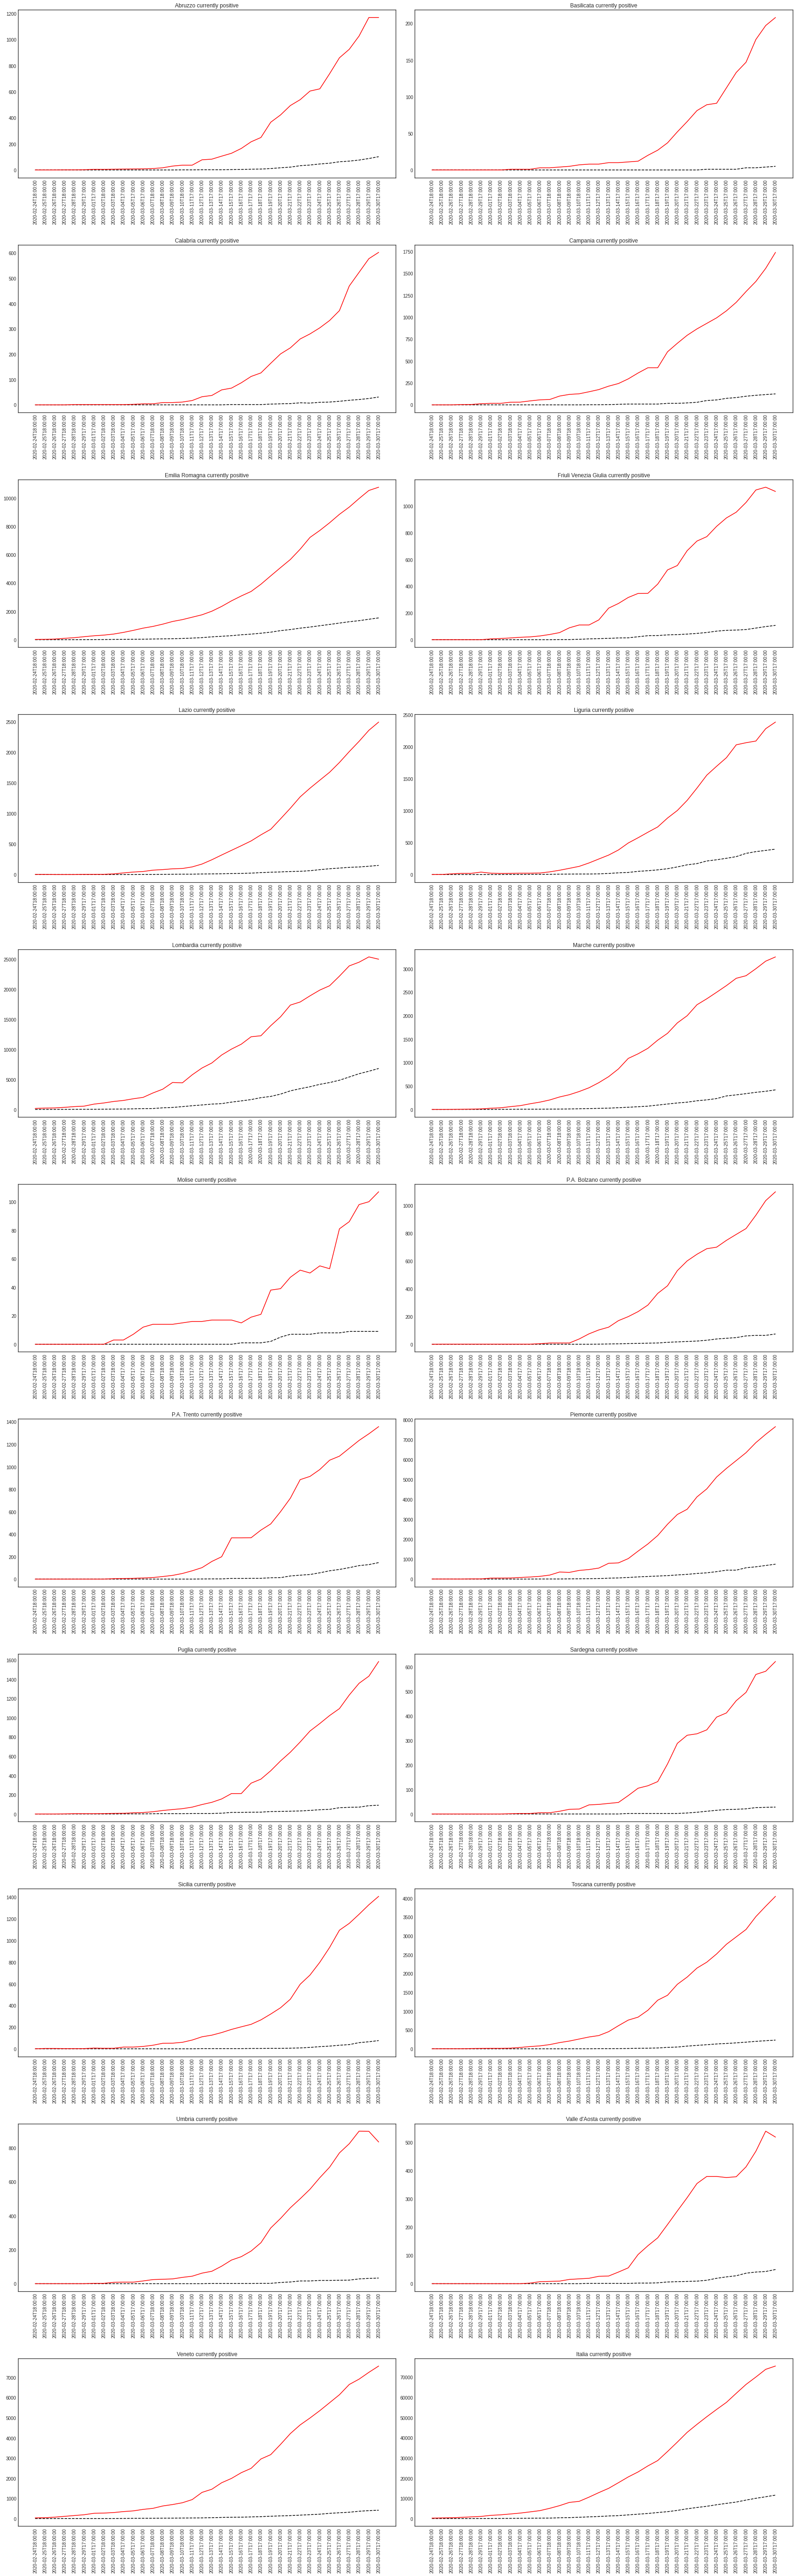

In [9]:
columns = list(italy_dead)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    #fig, ax = plt.subplots(2,3,i,figsize=(10, 5))
    ax = f.add_subplot(11, 2, i)
    region_positive = italy_currently_positive[[region]]
    region_positive.columns = ['Positive']
    region_dead = italy_dead[[region]]
    region_dead.columns = ['Dead']
    #plt.bar(region_dead.index, height=region_dead.Dead, label=region, alpha=0.3)
    #plt.bar(region_positive.index, height=region_positive.Positive, label=region, alpha=0.3)
    ax.plot(region_dead.index, region_dead.Dead, '--k')
    ax.plot(region_positive.index, region_positive['Positive'], '-r')
    ax.set_title(region + ' currently positive')
    ax.set_xticklabels(region_positive.index,rotation=90)
    i=i+1


I grafici indicano un calo dei contagi in Lombradia, Friuli Venezia Giulia, Umbria e Valle d'Aosta che non consente ancora alla curva globale di smettere di crescere perchè ci sono regioni dove la crescita è ancora sostenuta ma è comunque un elemento di novità molto positivo che potrebbe preludere ad un calo a livello nazionale

Segue una comparazione tra regioni relativa al numero di attualmente positivi

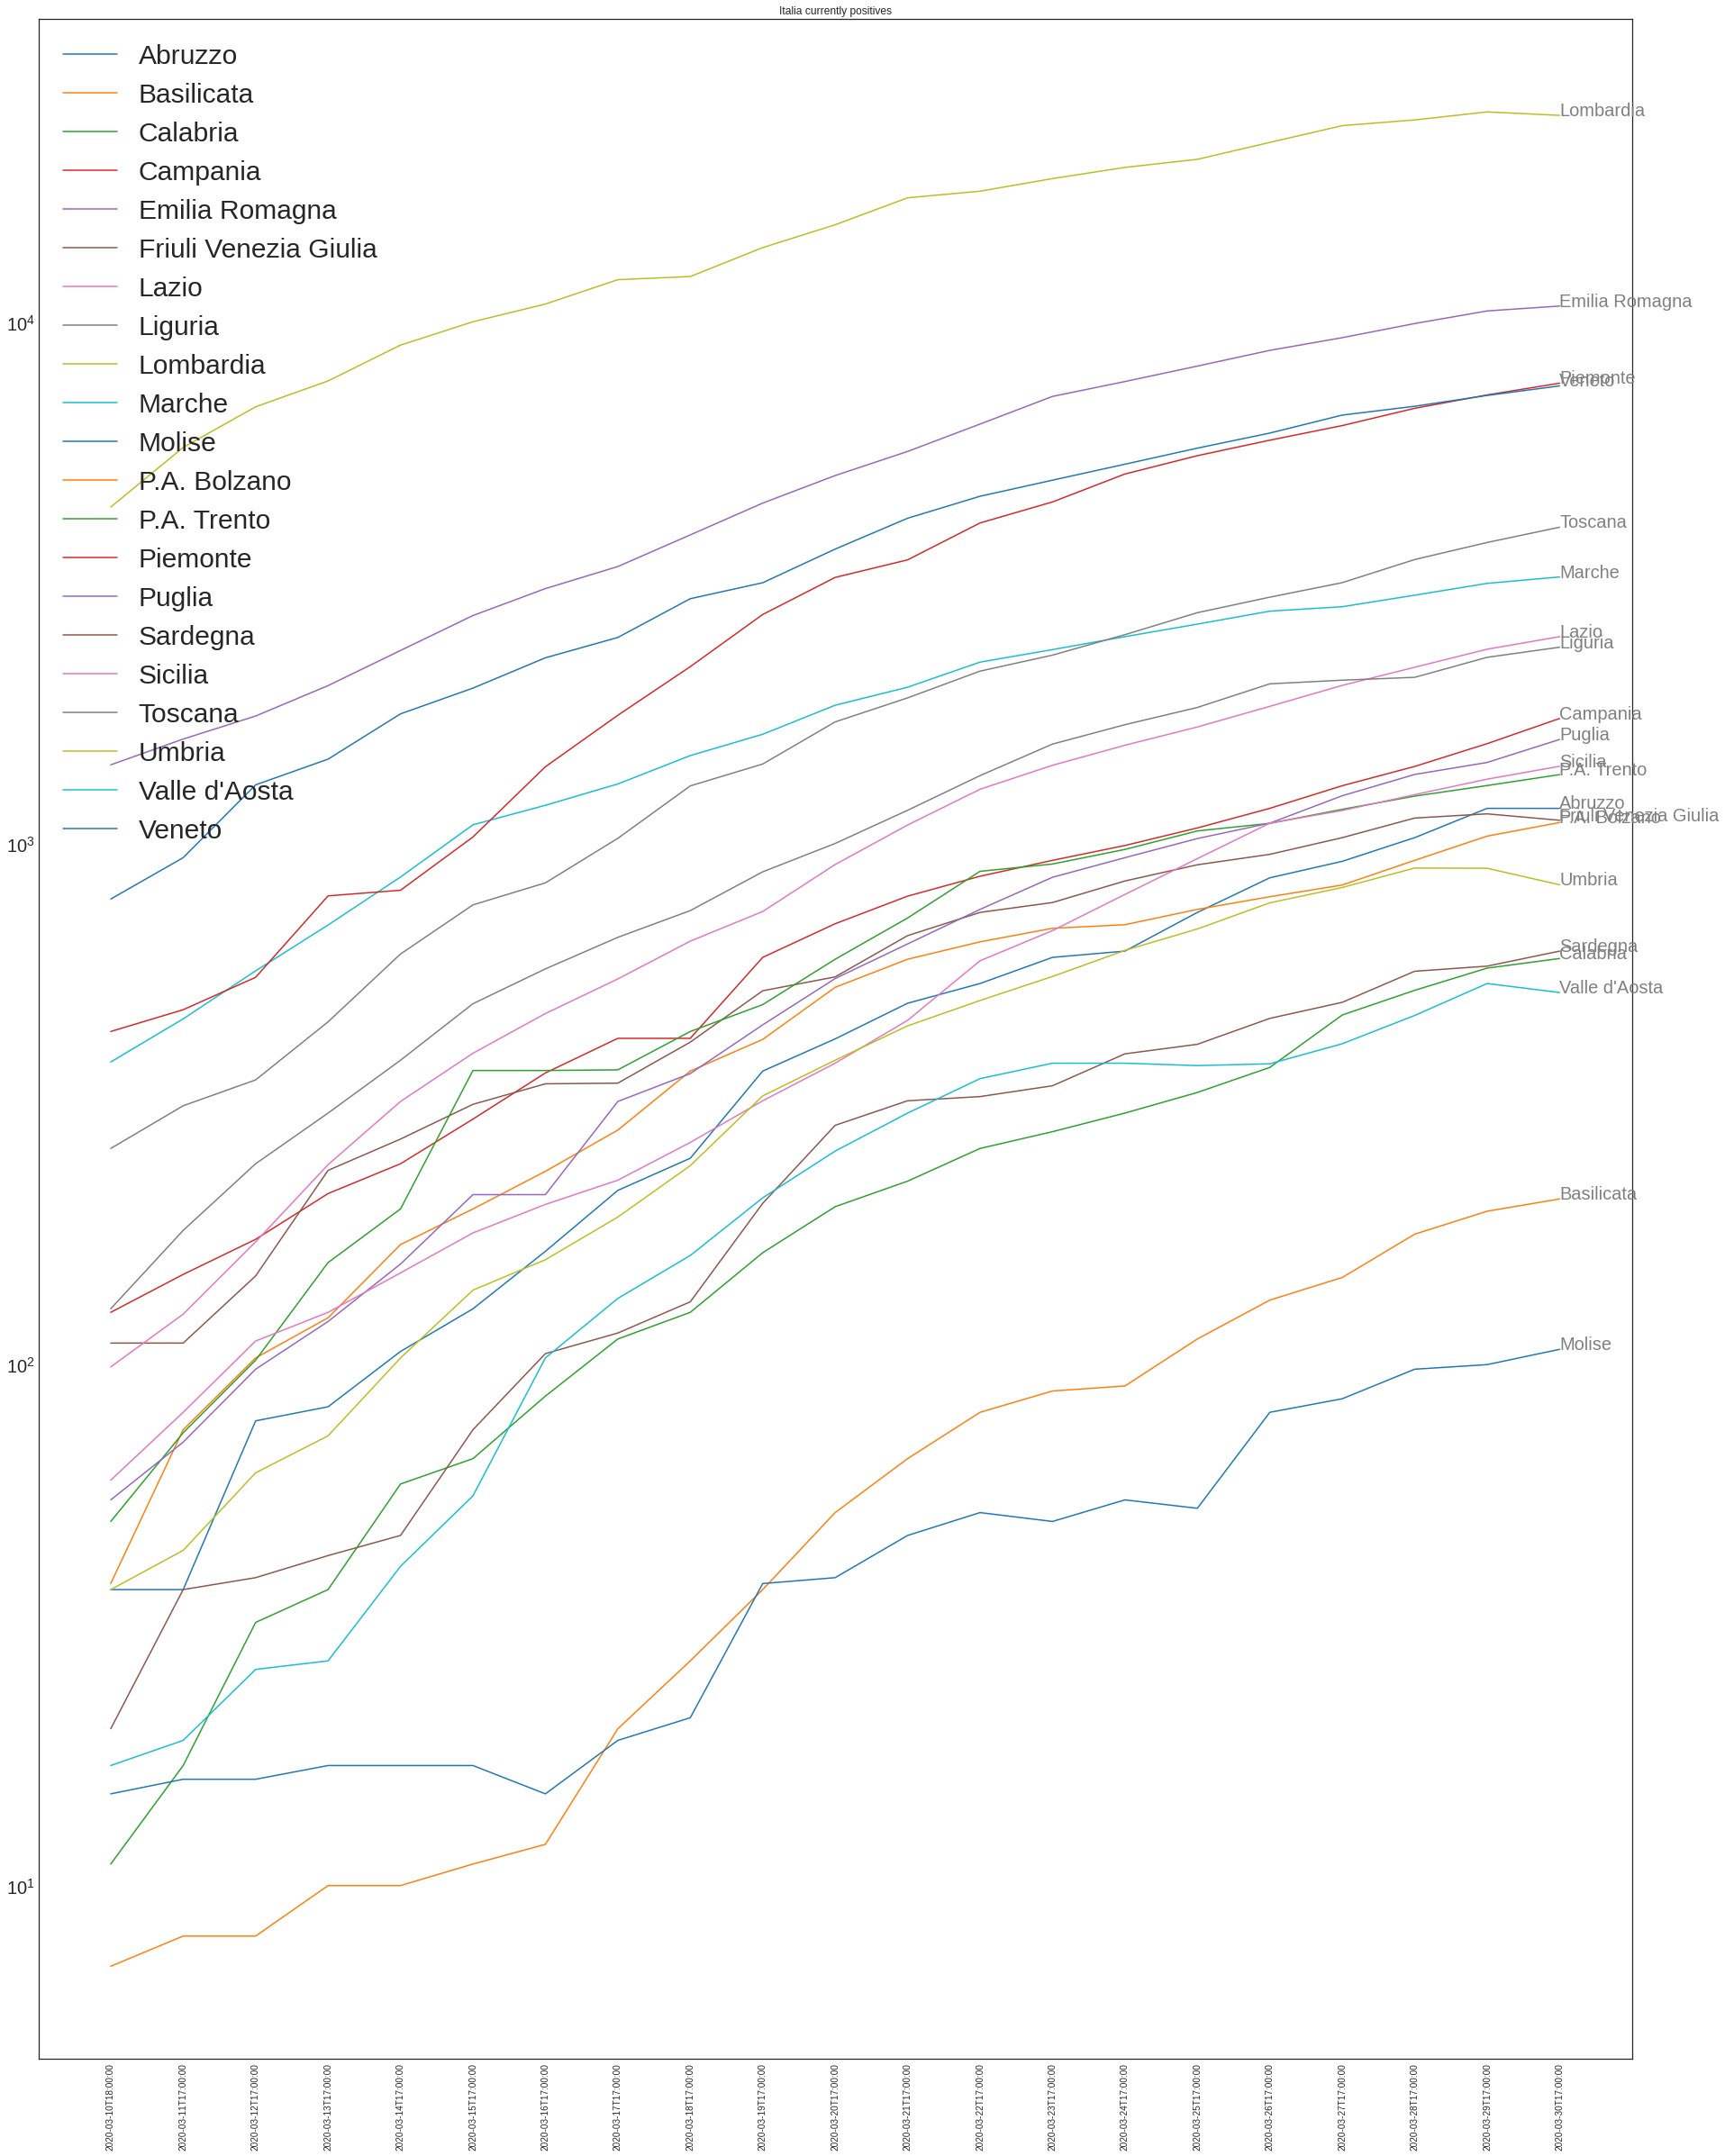

In [10]:
style = dict(size=20, color='gray')
columns = list(italy_dead)
last_day = covid['date'].max()
f = plt.figure(figsize=(65,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
i = 0
for region in columns: 
    if (region != 'Italia'):
        region_positive = italy_currently_positive[[region]]
        region_positive = region_positive[15:]
        region_positive.columns = ['Positive']
        ax.plot(region_positive.index, region_positive['Positive'], label=region)
        ax.text(20, region_positive.loc[last_day, 'Positive'], region, **style)
        i=i+1

ax.set_title(region + ' currently positives')
ax.set_xticklabels(region_positive.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
#ax.set_yticklabels(fontsize='small')
ax.set_yscale('log')
#ax.set_yticks(fontsize=15)
plt.legend(loc="upper left", prop={'size': 30})


In Lombardia, Friuli, Umbria e Valle d'Aosta per la prima volta si è registrato un decremento. Per cantare vittoria è opportuno attendere qualche giorno e affidarsi, come di seguito, ad una più prudente media mobile a tre giorni.


Mentre la curva dei totali positivi (quindi comprensiva di guariti e deceduti) avrà un andamento sigmoidale, ossia tipo questo:


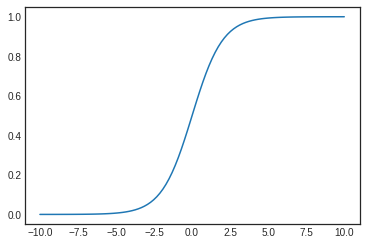

In [29]:
x = np.linspace(-10, 10, 100)
y = 1/(1 + np.exp(-x))
plt.plot(x, y)
plt.show()

... ci si aspetta che quella degli attualmente positivi raggiunga un picco per poi quindi scendere, magari con una discesa più lenta rispetto alla salita, ed infine tendere a zero: 

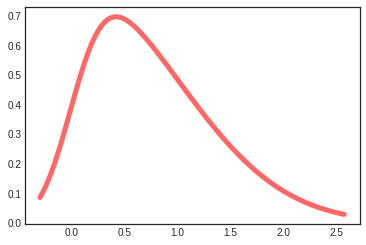

In [30]:
from scipy.stats import skewnorm
fig, ax = plt.subplots(1, 1)
a = 4
x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
ax.plot(x, skewnorm.pdf(x, a), 'r-', lw=5, alpha=0.6, label='skewnorm pdf')

Vediamo allora l'andamento regione per regione di velocità (i nuovi contagi) ed accelerazione del numero dei positivi correnti (media mobile a tre giorni)

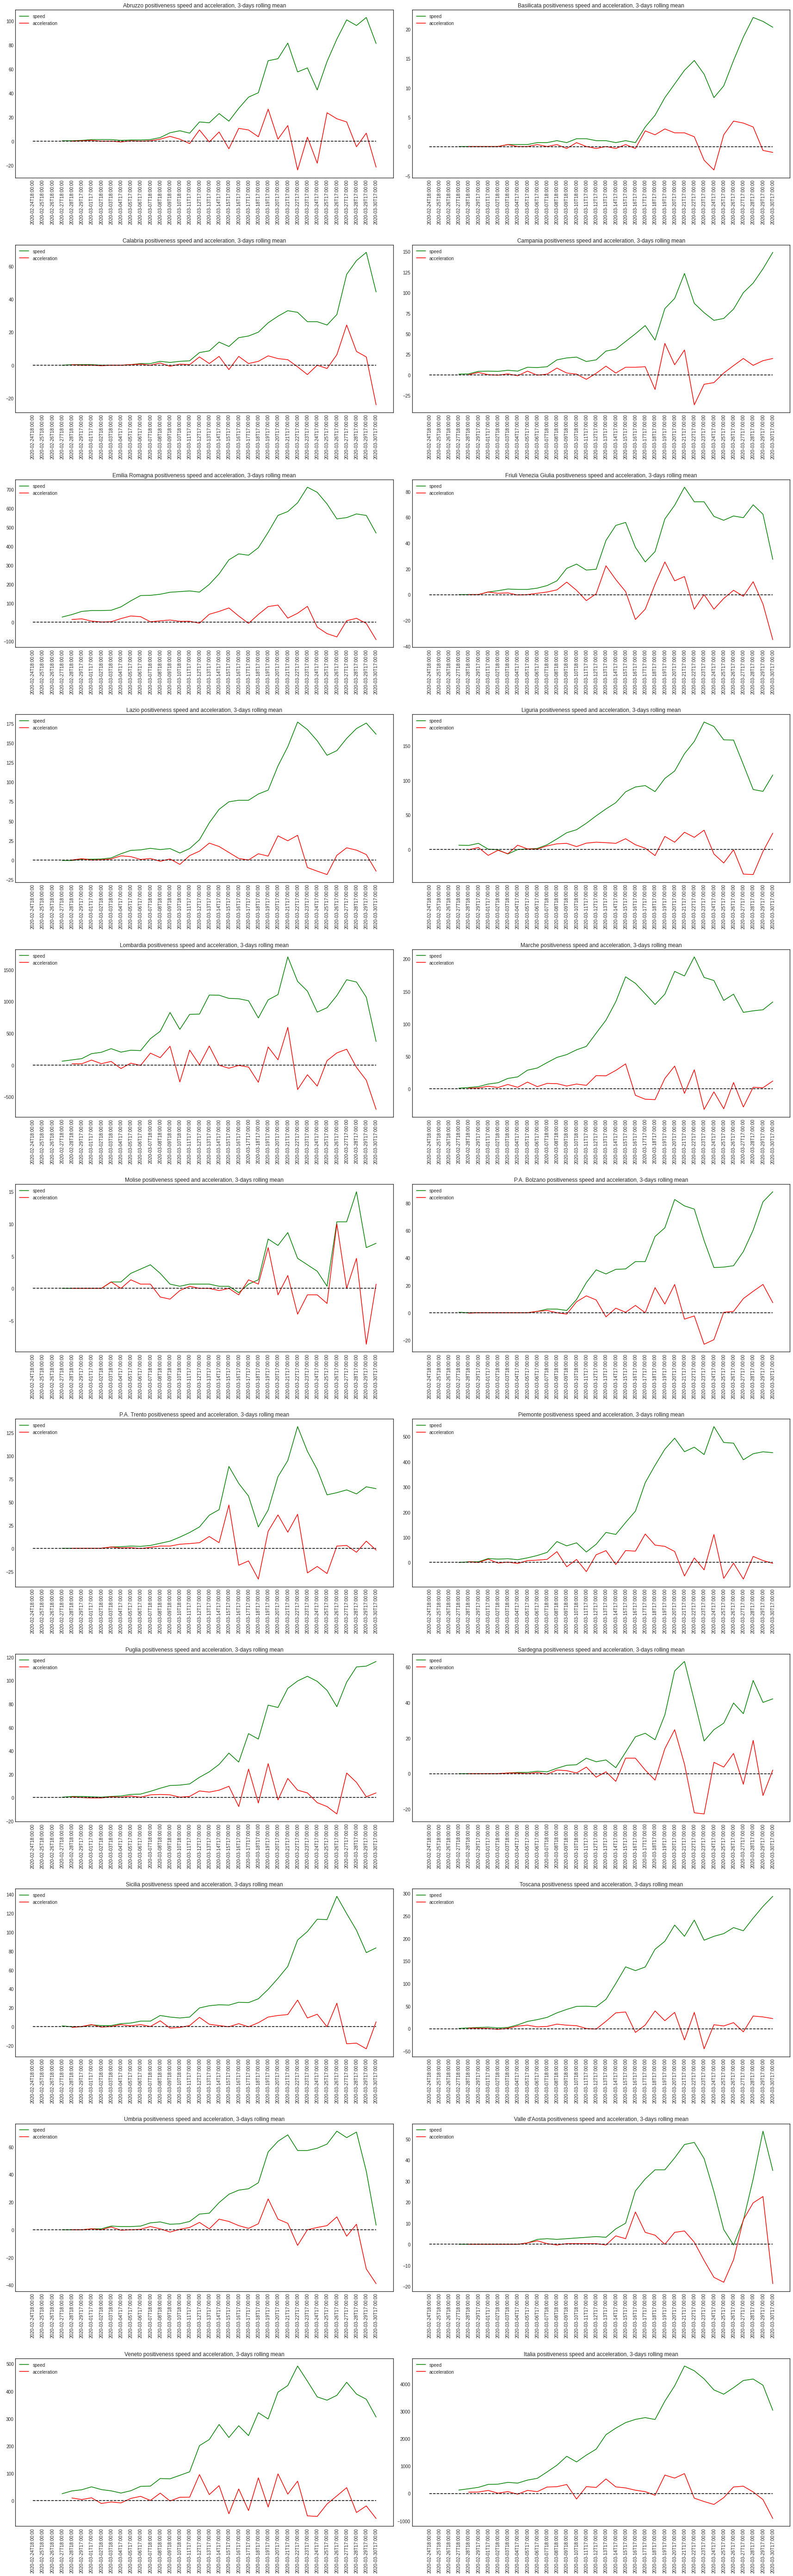

In [14]:
columns = list(italy_currently_positive)
i=1
f = plt.figure(figsize=(30,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
for region in columns: 
    ax = f.add_subplot(11, 2, i)
    region_positive = italy_currently_positive[[region]]
    region_positive.columns = ['Positive']
    ax.plot(region_positive.index, region_positive['Positive'].rolling(window=3).mean().diff(), '-g', label='speed')
    ax.set_title(region + ' currently positive delta')
    ax.set_xticklabels(region_positive.index,rotation=90)
    ax.plot(region_positive.index, region_positive['Positive'].rolling(window=3).mean().diff().diff(), '-r', label='acceleration')
    ax.plot(region_positive.index, np.zeros(region_positive.index.size), '--k')
    ax.set_title(region + ' positiveness speed and acceleration, 3-days rolling mean')
    ax.set_xticklabels(region_positive.index,rotation=90)
    ax.legend(loc='upper left', frameon=False)
    i=i+1


In [15]:
italy_currently_positive['Italia'].rolling(window=3).mean().diff()

date
2020-02-24T18:00:00            NaN
2020-02-25T18:00:00            NaN
2020-02-26T18:00:00            NaN
2020-02-27T18:00:00     122.333333
2020-02-28T18:00:00     170.000000
2020-02-29T17:00:00     221.333333
2020-03-01T17:00:00     329.666667
2020-03-02T18:00:00     338.000000
2020-03-03T18:00:00     404.666667
2020-03-04T17:00:00     376.333333
2020-03-05T17:00:00     487.000000
2020-03-06T17:00:00     551.000000
2020-03-07T18:00:00     785.000000
2020-03-08T18:00:00    1030.333333
2020-03-09T18:00:00    1356.333333
2020-03-10T18:00:00    1151.000000
2020-03-11T17:00:00    1401.000000
2020-03-12T17:00:00    1618.000000
2020-03-13T17:00:00    2147.000000
2020-03-14T17:00:00    2386.666667
2020-03-15T17:00:00    2588.000000
2020-03-16T17:00:00    2706.000000
2020-03-17T17:00:00    2770.666667
2020-03-18T17:00:00    2702.333333
2020-03-19T17:00:00    3372.333333
2020-03-20T17:00:00    3932.666667
2020-03-21T17:00:00    4657.000000
2020-03-22T17:00:00    4482.666667
2020-03-23T17:0

Ciò che interessa maggiormente ai fini predittivi è la data e l'intensità del picco degli attualmente positivi. Se fosse possibile stimare queste due quantità il Sistema Sanitario Regionale potrebbe organizzarsi.


Si ravvisano importanti frenate in Abruzzo, Calabria, Emilia Romagna, Friuli Venezia Giulia, Lombardia, Umbria, Valle d'Aosta, Veneto e a livello nazionale, evidente risposta al lockdown.
In controtendenza solo Campania e, dopo diversi giorni di rallentamento, Liguria.

**Il picco si configura nel momento in cui la velocità toccherà lo zero senza più aumentare**.

Grazie al lockdown il picco effettivo dovrebbe essere più basso e più lontano nel tempo rispetto a quello previsto, secondo quanto descritto in questo [studio](https://www.visualcapitalist.com/infection-trajectory-flattening-the-covid19-curve/?fbclid=IwAR3KsS0FJgZPdCwoj0uw7qNO5bagm59eKdg85C12Wjw3T0w8mODXaX9iU8g)

Almeno per Lombardia, Friuli e Umbria si può ritenere che la svolta si verifichi entro 1 o 2 giorni. Per quanto riguarda l'Italia intera, se si ritiene la giornata di oggi come la prima in cui si sente finalmente l'effetto del lockdown, si può prevedere che **il picco si verifichi entro 3/4 giorni, quindi entro il 3 aprile**.

Segue una comparazione tra regioni relativa al numero di deceduti

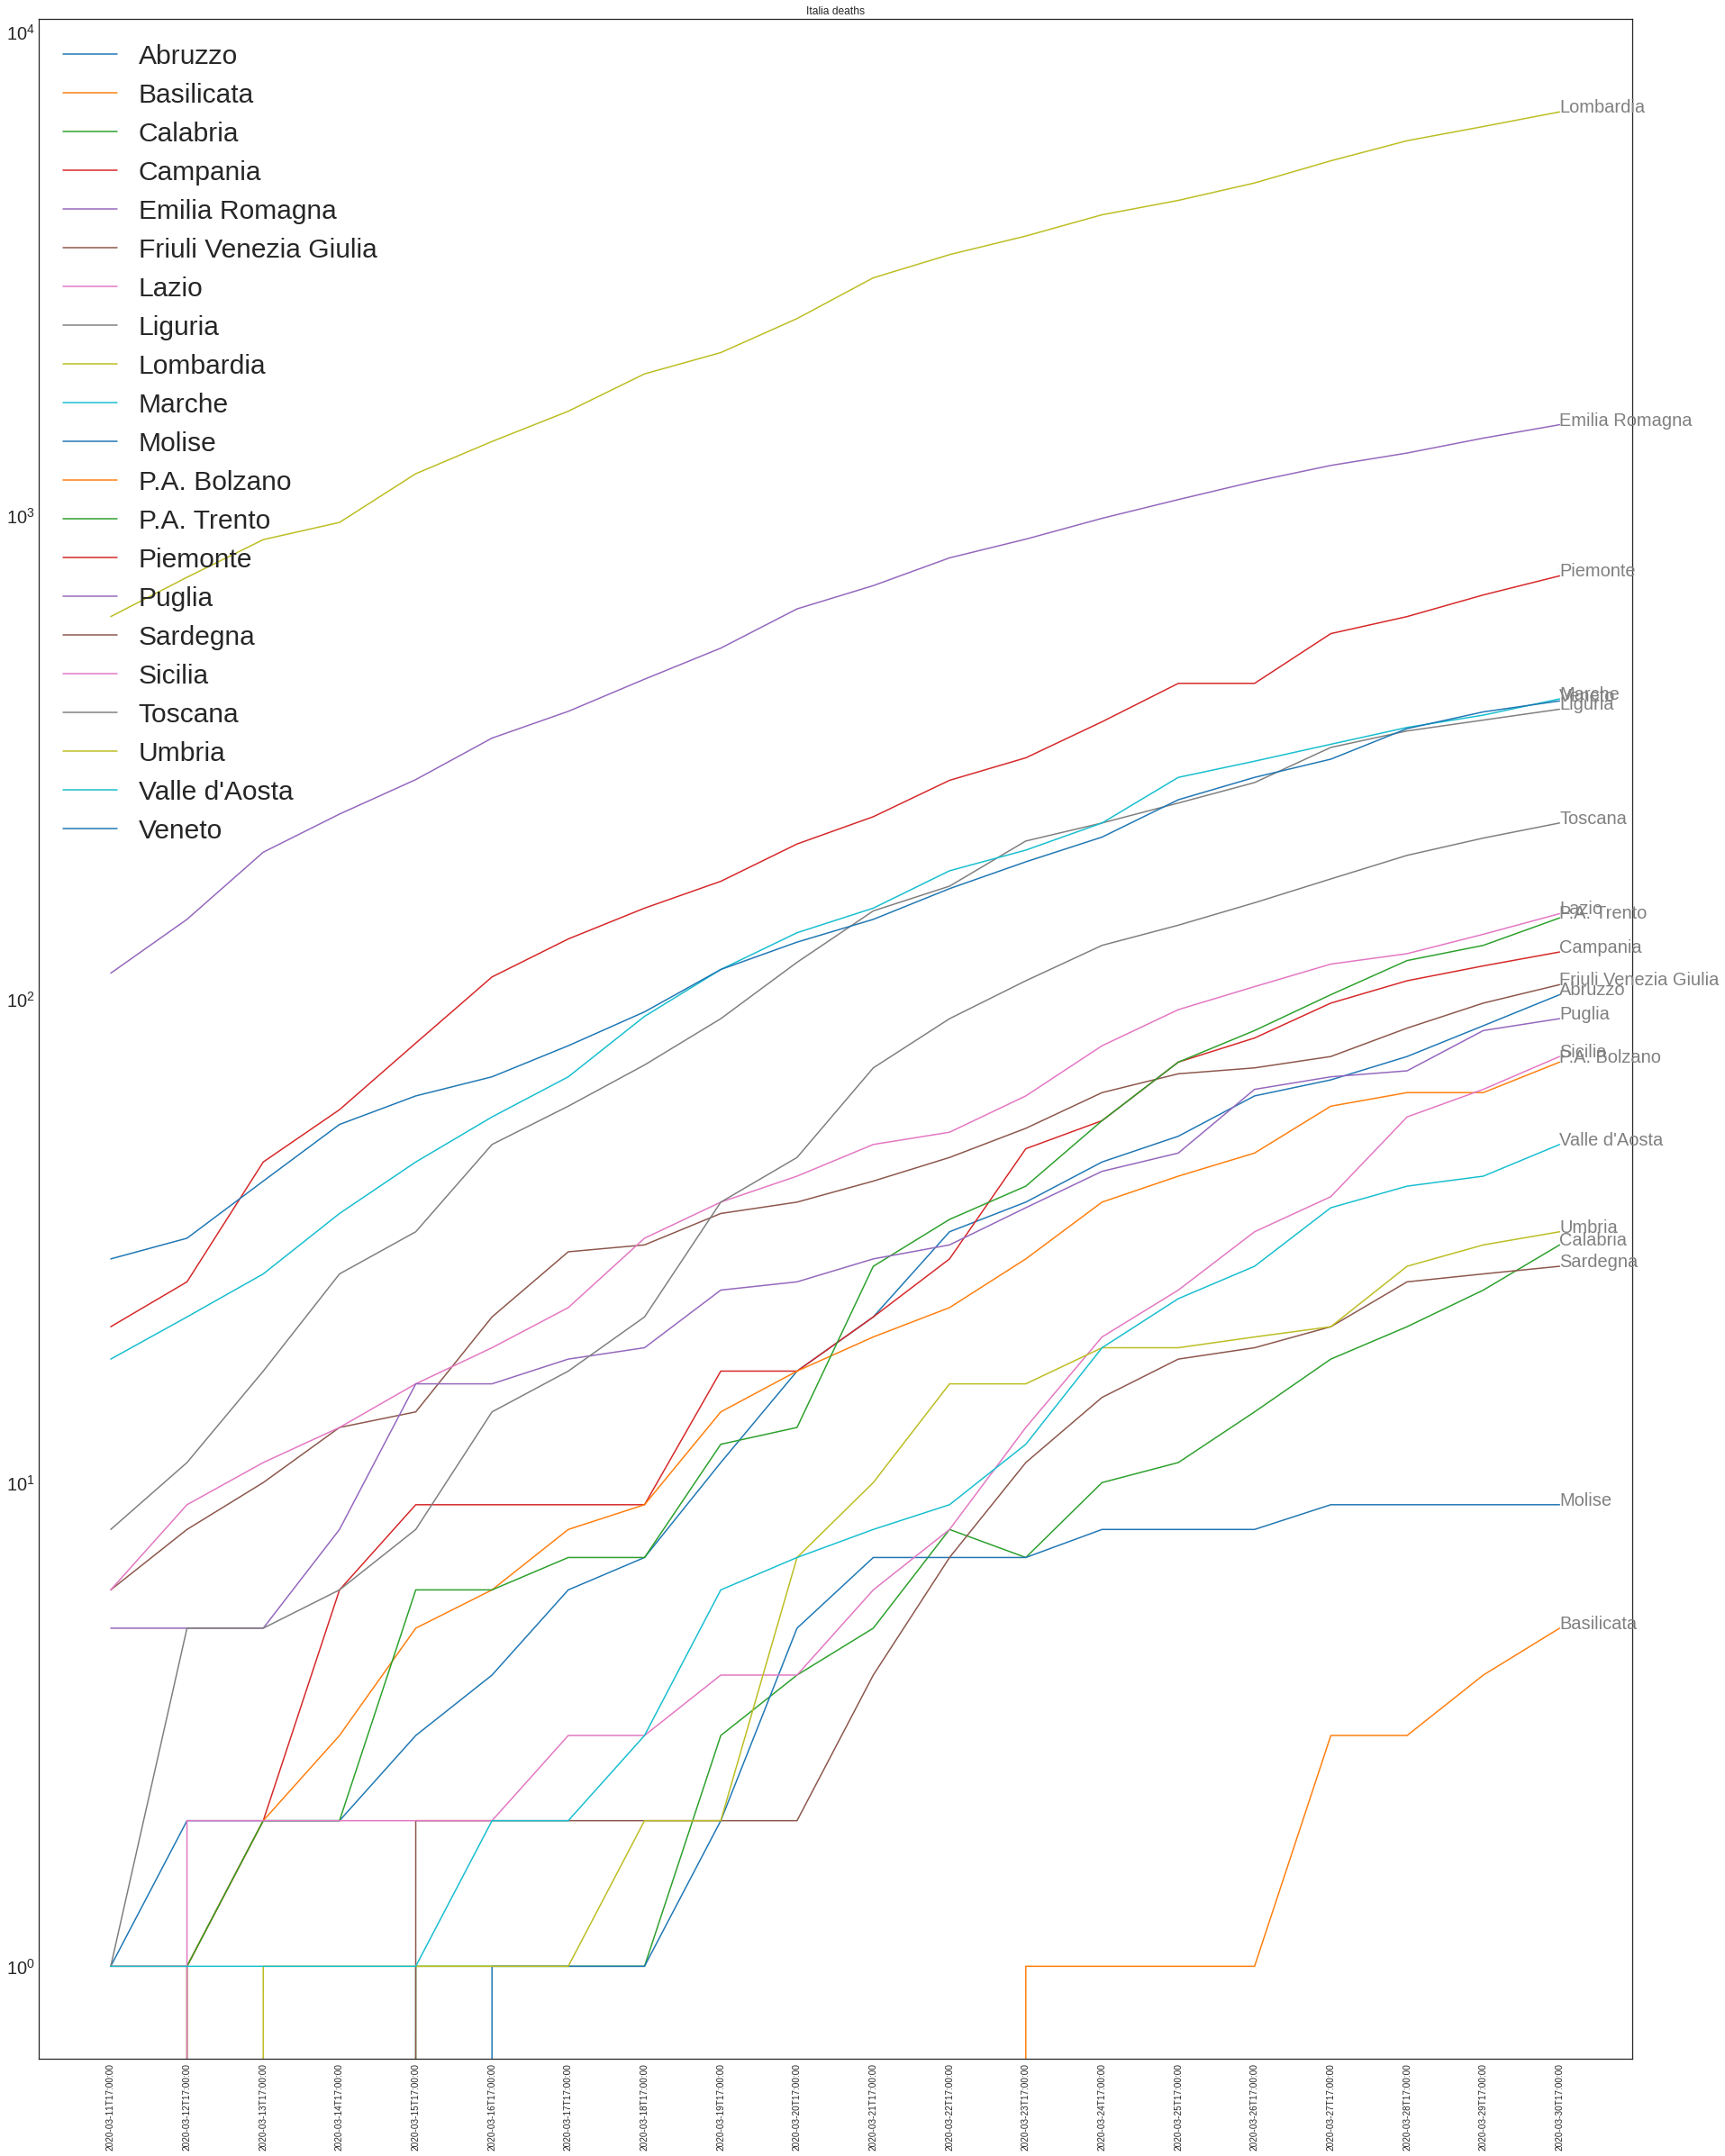

In [11]:
style = dict(size=20, color='gray')
columns = list(italy_dead)
last_day = covid['date'].max()
f = plt.figure(figsize=(65,100))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
i = 0
for region in columns: 
    if (region != 'Italia'):
        region_dead = italy_dead[[region]]
        region_dead = region_dead[16:]
        region_dead.columns = ['Dead']
        ax.plot(region_dead.index, region_dead['Dead'], label=region)
        ax.text(19, region_dead.loc[last_day, 'Dead'], region, **style)
        i=i+1

ax.set_title(region + ' deaths')
ax.set_xticklabels(region_dead.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
#ax.set_yticklabels(fontsize='small')
ax.set_yscale('log')
#ax.set_yticks(fontsize=15)
plt.legend(loc="upper left", prop={'size': 30})


Le curve dei deceduti sono ancora in salita ed è comprensibile, dal momento che si riferiscono a contagi risalenti almeno ad una settimana fa.



Nella seguente grafica viene rappresentata l'istantanea del rapporto tra deceduti e totali positivi su tutte le regioni, giorno per giorno, con media mobile a 3 giorni


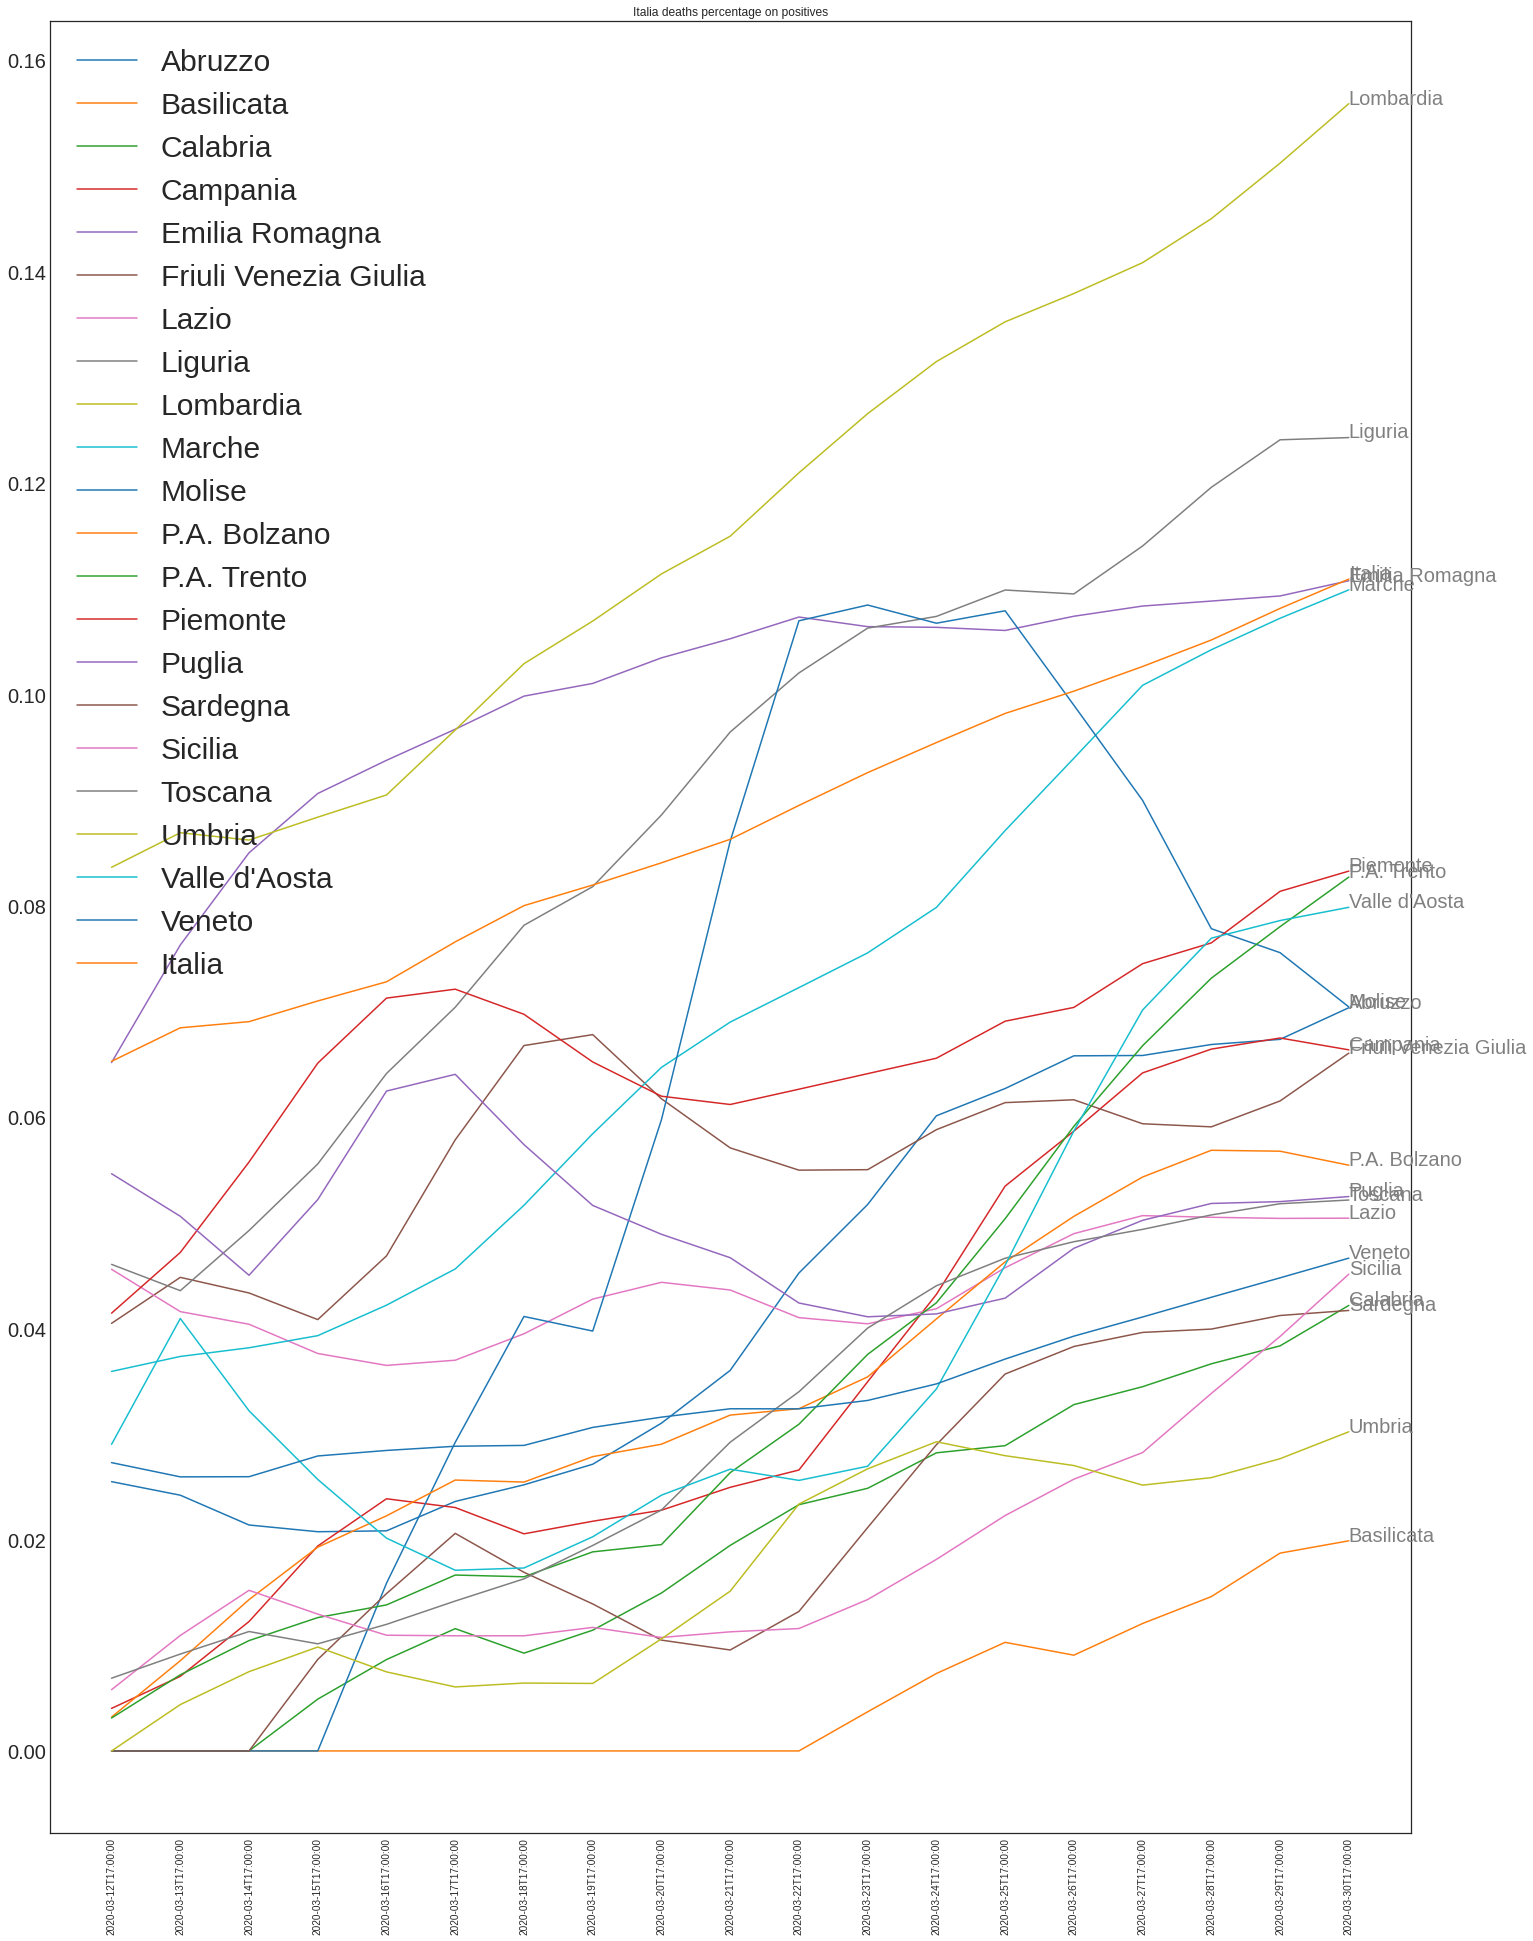

In [16]:
italy_dead_vs_total = italy_dead/italy_total_positive
style = dict(size=20, color='gray')
columns = list(italy_dead_vs_total)
last_day = covid['date'].max()
f = plt.figure(figsize=(50,80))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
i = 0
for region in columns: 
    region_dead = italy_dead_vs_total[[region]]
    region_dead = region_dead[15:]
    region_dead.columns = ['Dead_percentage']
    ax.plot(region_dead.index, region_dead['Dead_percentage'].rolling(window=3).mean(), label=region)
    ax.text(20, region_dead.rolling(window=3).mean().loc[last_day, 'Dead_percentage'], region, **style)
    i=i+1

ax.set_title(region + ' deaths percentage on positives')
ax.set_xticklabels(region_dead.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
#ax.set_yticklabels(fontsize='small')
ax.set_yscale('linear')
#ax.set_yticks(fontsize=15)
plt.legend(loc="upper left", prop={'size': 30})


E' la Lombardia a soffrire il più alto tasso di deceduti rispetto ai positivi, seguita a poca distanza dalla Liguria, quindi da Emilia Romagna e Marche che rappresentano la media nazionale. 


Il fenomeno è particolarmente in ascesa nella provincia di Trento, nelle Marche, in Sicilia e Lombardia.



Cerchiamo di capire se c'è una correlazione tra densità abitativa e numero di contagiati totale in base all'ultima rilevazione

In [0]:
last_day = covid['date'].max()
italy_total_positive_last_day = italy_total_positive[italy_total_positive.index == last_day]
italy_total_positive_last_day_flat = italy_total_positive_last_day.stack().reset_index(name='positive')[['denominazione_regione', 'positive']]
mergedf = pd.merge(italy_total_positive_last_day_flat, population_density)

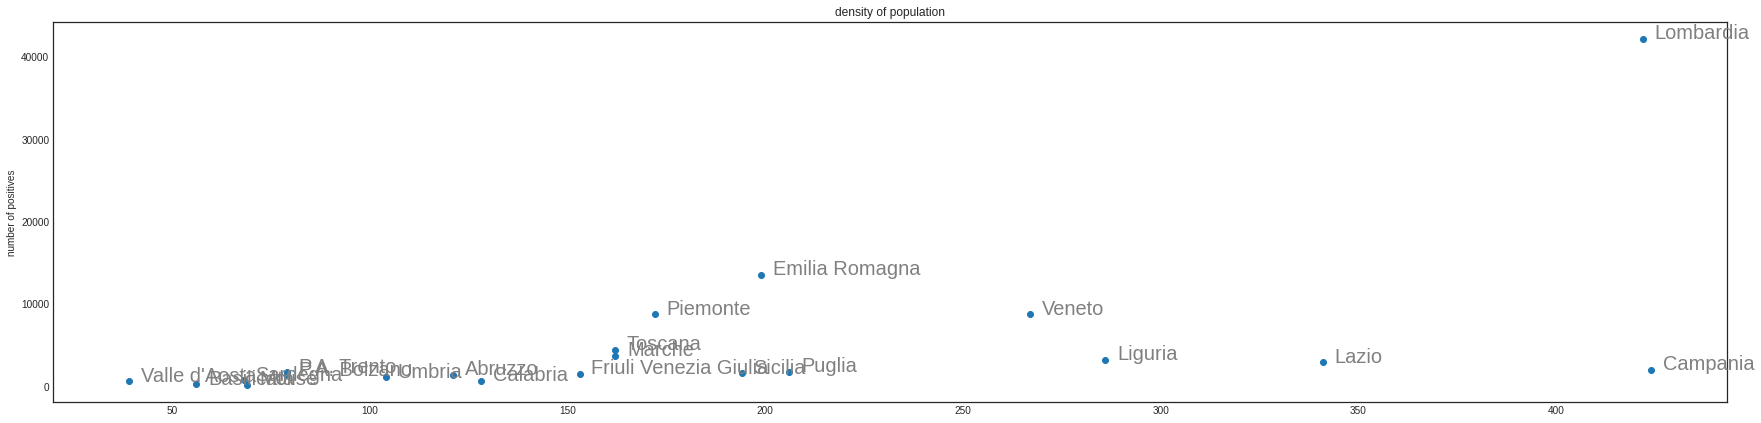

In [20]:
fig, ax = plt.subplots(figsize=(30, 7))
plt.scatter(mergedf['density'], mergedf['positive'])
style = dict(size=20, color='gray')
for i in range(21):
    ax.text(mergedf.loc[i, 'density']+3, mergedf.loc[i, 'positive'], mergedf.loc[i, 'denominazione_regione'], **style)
ax.set(title='density of population', ylabel='number of positives')
plt.show()


Questo plot non fornisce grossi spunti a prima vista. Di sicuro basse densità abitative sembrano essere correlate a basse percentuali di positività. Meno chiaro è ciò che avviene a densità medie ed alte dove si vedono risultati discordanti. Bisogna però tenere conto che in quest'area le regioni a basso numero di positivi sono, a parte la Liguria, regioni del centro-sud dove l'epidemia è arrivata in ritardo rispetto al nord, il che se da una parte può preludere ad una salita, dall'altra sconta il lockdown già nelle fasi iniziali

**Adesso si ripropongono più o meno le stesse analisi ma con i dati normalizzati in base alla popolazione**

In [0]:
#source: https://www.tuttitalia.it/regioni/
population_density = pd.DataFrame([
              {'denominazione_regione': 'Abruzzo', 'density': 121, 'population': 1311580}, 
              {'denominazione_regione': 'Basilicata', 'density': 56, 'population': 562869}, 
              {'denominazione_regione': 'Calabria', 'density': 128, 'population': 1947131}, 
              {'denominazione_regione': 'Campania', 'density': 424, 'population': 5801692}, 
              {'denominazione_regione': 'Emilia Romagna', 'density': 199, 'population': 4459477}, 
              {'denominazione_regione': 'Friuli Venezia Giulia', 'density': 153, 'population': 1215220}, 
              {'denominazione_regione': 'Lazio', 'density': 341, 'population': 5879082}, 
              {'denominazione_regione': 'Liguria', 'density': 286, 'population': 1550640}, 
              {'denominazione_regione': 'Lombardia', 'density': 422, 'population': 10060574}, 
              {'denominazione_regione': 'Marche', 'density': 162, 'population': 1525271}, 
              {'denominazione_regione': 'Molise', 'density': 69, 'population': 305617}, 
              {'denominazione_regione': 'P.A. Bolzano', 'density': 79, 'population': 536137}, 
              {'denominazione_regione': 'P.A. Trento', 'density': 79, 'population': 536137}, 
              {'denominazione_regione': 'Piemonte', 'density': 172, 'population': 4356406}, 
              {'denominazione_regione': 'Puglia', 'density': 206, 'population': 4029053}, 
              {'denominazione_regione': 'Sardegna', 'density': 68, 'population': 1639591}, 
              {'denominazione_regione': 'Sicilia', 'density': 194, 'population': 4999891}, 
              {'denominazione_regione': 'Toscana', 'density': 162, 'population': 3729641}, 
              {'denominazione_regione': 'Umbria', 'density': 104, 'population': 882015}, 
              {'denominazione_regione': 'Valle d\'Aosta', 'density': 39, 'population': 125666}, 
              {'denominazione_regione': 'Veneto', 'density': 267, 'population': 4905854}, 
            ]) 


In [0]:
tempdf = pd.DataFrame([{'denominazione_regione': 'Italia', 'population': population_density['population'].sum()}])
population = population_density[['denominazione_regione', 'population']]
population = population.append(tempdf, ignore_index = True)
population_pivot = population.pivot_table('population', columns='denominazione_regione')

Normalizziamo i dati sul numero di positivi in base alla popolazione di ciascuna regione, ottenendo quindi la percentuale di abitanti positivi di ogni regione

In [0]:
italy_total_positive_normalized = italy_total_positive.copy()
columns = list(italy_total_positive_normalized)
for regione in columns: 
    italy_total_positive_normalized[regione] = italy_total_positive[regione]/population_pivot.loc['population', regione]


Visualizziamo quindi la percentuale di positivi (dato lordo, quindi comprensivo di deceduti e guariti) di tutte le regioni sul totale delle loro popolazioni, giorno per giorno

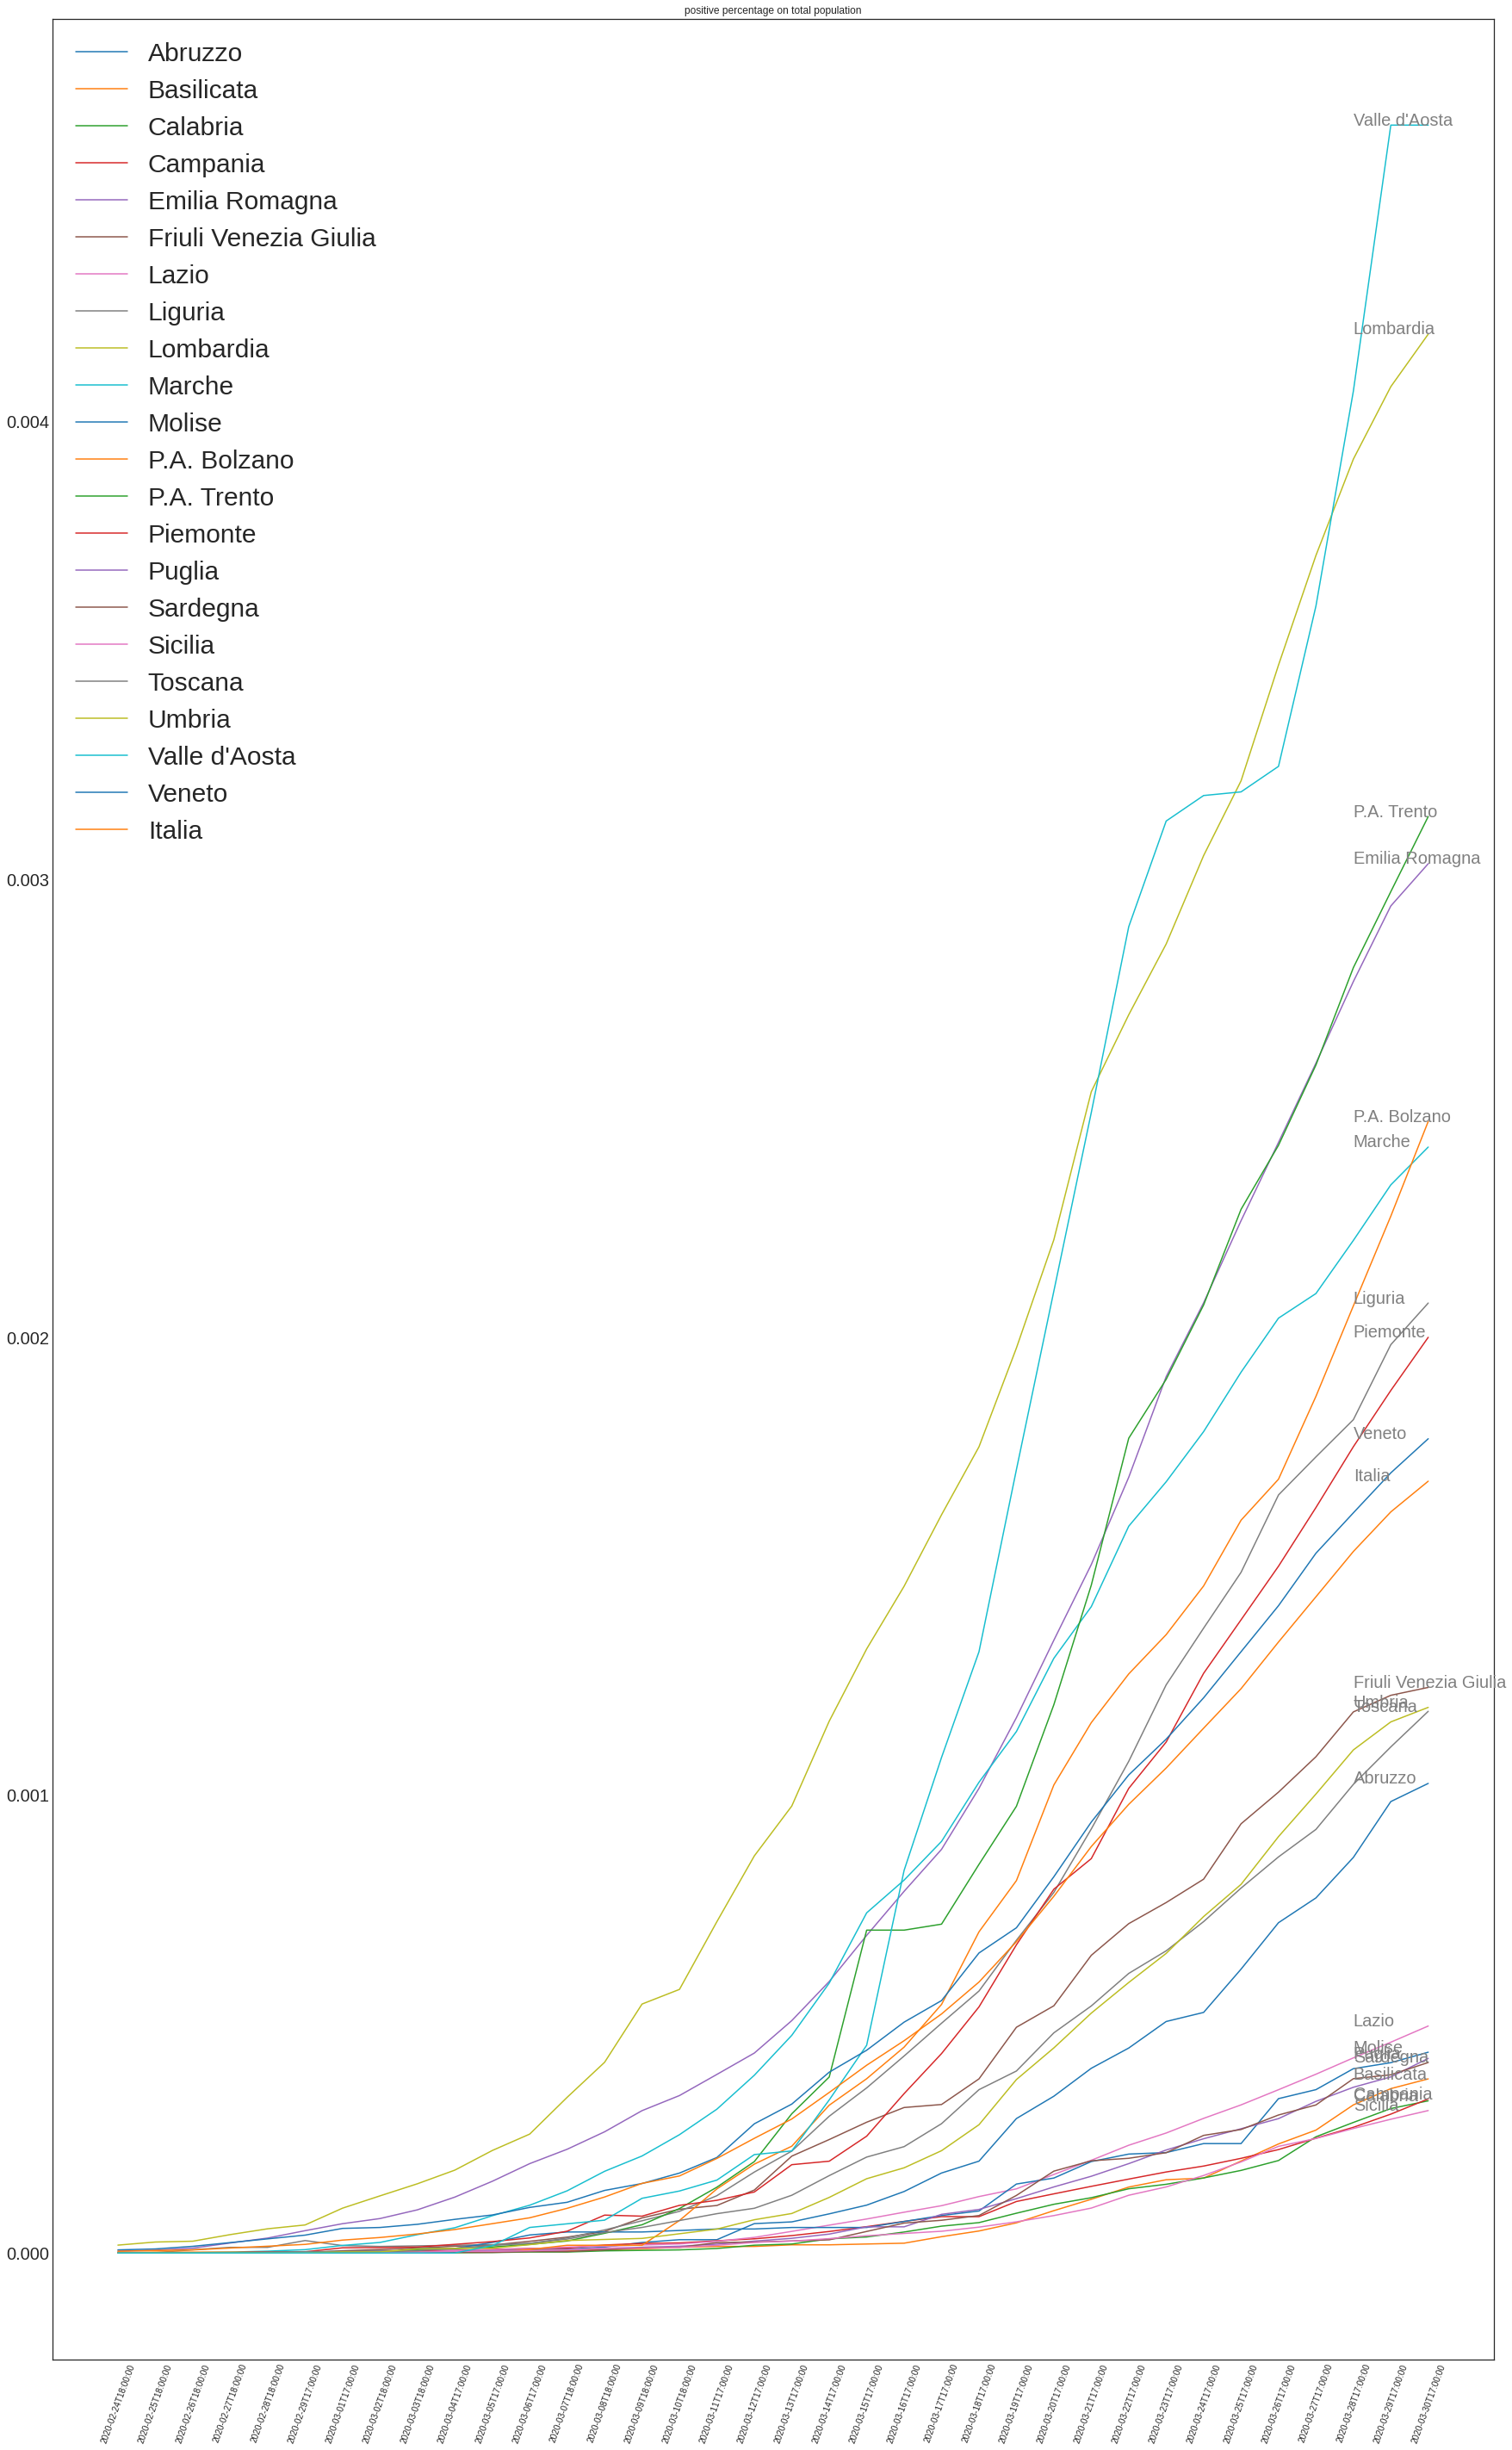

In [23]:
style = dict(size=20, color='gray')
columns = list(italy_total_positive_normalized)
last_day = covid['date'].max()
f = plt.figure(figsize=(30,50))
ax = f.add_subplot(1, 1, 1)
for region in columns: 
    region_tpn = italy_total_positive_normalized[[region]]
    #region_tpn = region_tpn[15:]
    region_tpn.columns = ['Positive_percentage']
    ax.plot(region_tpn.index, region_tpn['Positive_percentage'], label=region)
    ax.text(33, region_tpn.loc[last_day, 'Positive_percentage'], region, **style)

ax.set_title('positive percentage on total population')
ax.set_xticklabels(italy_total_positive_normalized.index,rotation=70)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})




Sopra la media nazionale Valle d'Aosta, Lombardia, Emilia Romagna, Trentino Alto Adige e Marche. Al 28/3 la Valle d'Aosta e Lombardia superano il tasso di positività del 4 per mille. Al 30/3 Provincia di Trento ed Emilia Romagna superano il 3 per mille.
Si precisa che queste curve non possono decrescere ma solo saturare e solo Valle d'Aosta e Friuli Venezia Giulia stanno provando a farlo.

Infine la correlazione tra densità abitativa e percentuale di positivi totali riferita all'ultima rilevazione

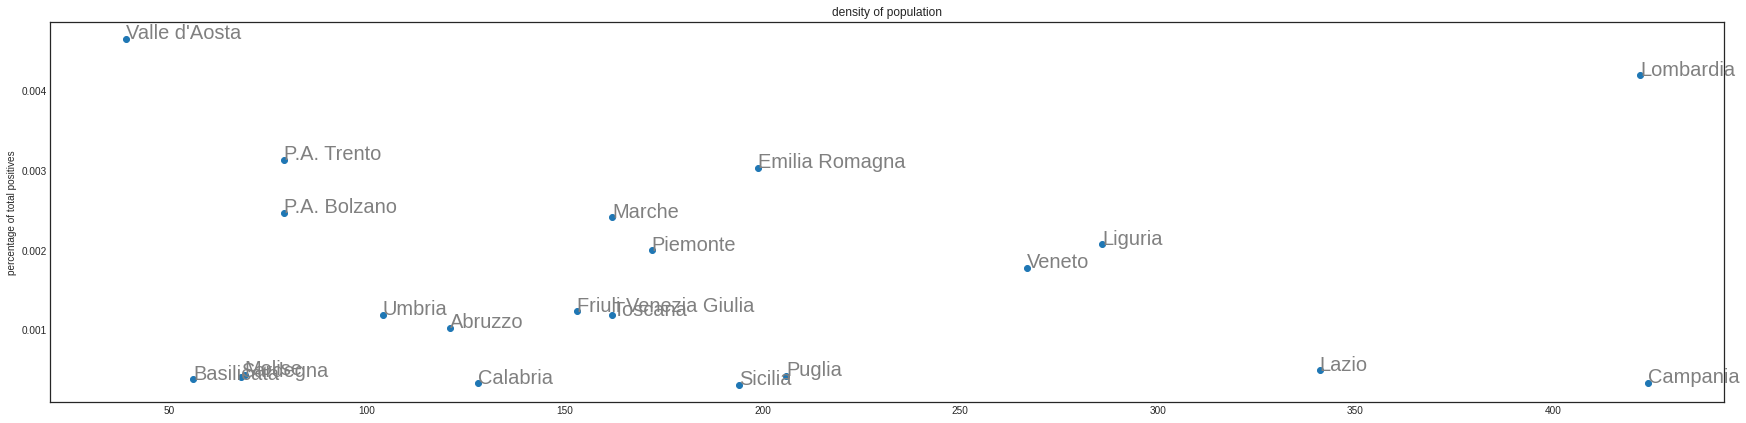

In [25]:
last_day = italy_total_positive_normalized.index[-1]
for day in italy_total_positive_normalized.index: 
    italy_total_positive_normalized_last_day = italy_total_positive_normalized[italy_total_positive_normalized.index == last_day]
italy_total_positive_normalized_last_day_flat = italy_total_positive_normalized_last_day.stack().reset_index(name='positive')[['denominazione_regione', 'positive']]
mergedf = pd.merge(italy_total_positive_normalized_last_day_flat, population_density)
fig, ax = plt.subplots(figsize=(30, 7))
plt.scatter(mergedf['density'], mergedf['positive'])
style = dict(size=20, color='gray')
for i in range(21):
    ax.text(mergedf.loc[i, 'density'], mergedf.loc[i, 'positive'], mergedf.loc[i, 'denominazione_regione'], **style)
ax.set(title='density of population', ylabel='percentage of total positives')
plt.show()


Questo plot non chiarisce nulla sull'eventuale correlazione tra le due grandezze ma sconta la differente maturità dell'epidemia da regione a regione, sul fondo infatti si trovano tutte le regioni del centro-sud che ad occhio hanno un ritardo di circa una settimana rispetto alle regioni del nord e che pertanto beneficiano maggiormente delle misure di prevenzione adottate in corso d\'opera.

Un altro spunto interessante potrebbe provenire dal rapporto tra numero di positivi totali e numero di tamponi effettuati, anche se i tamponi non sono stati effettuati in maniera casuale ma solo a chi presentava sintomi riconducibili al Coronavirus

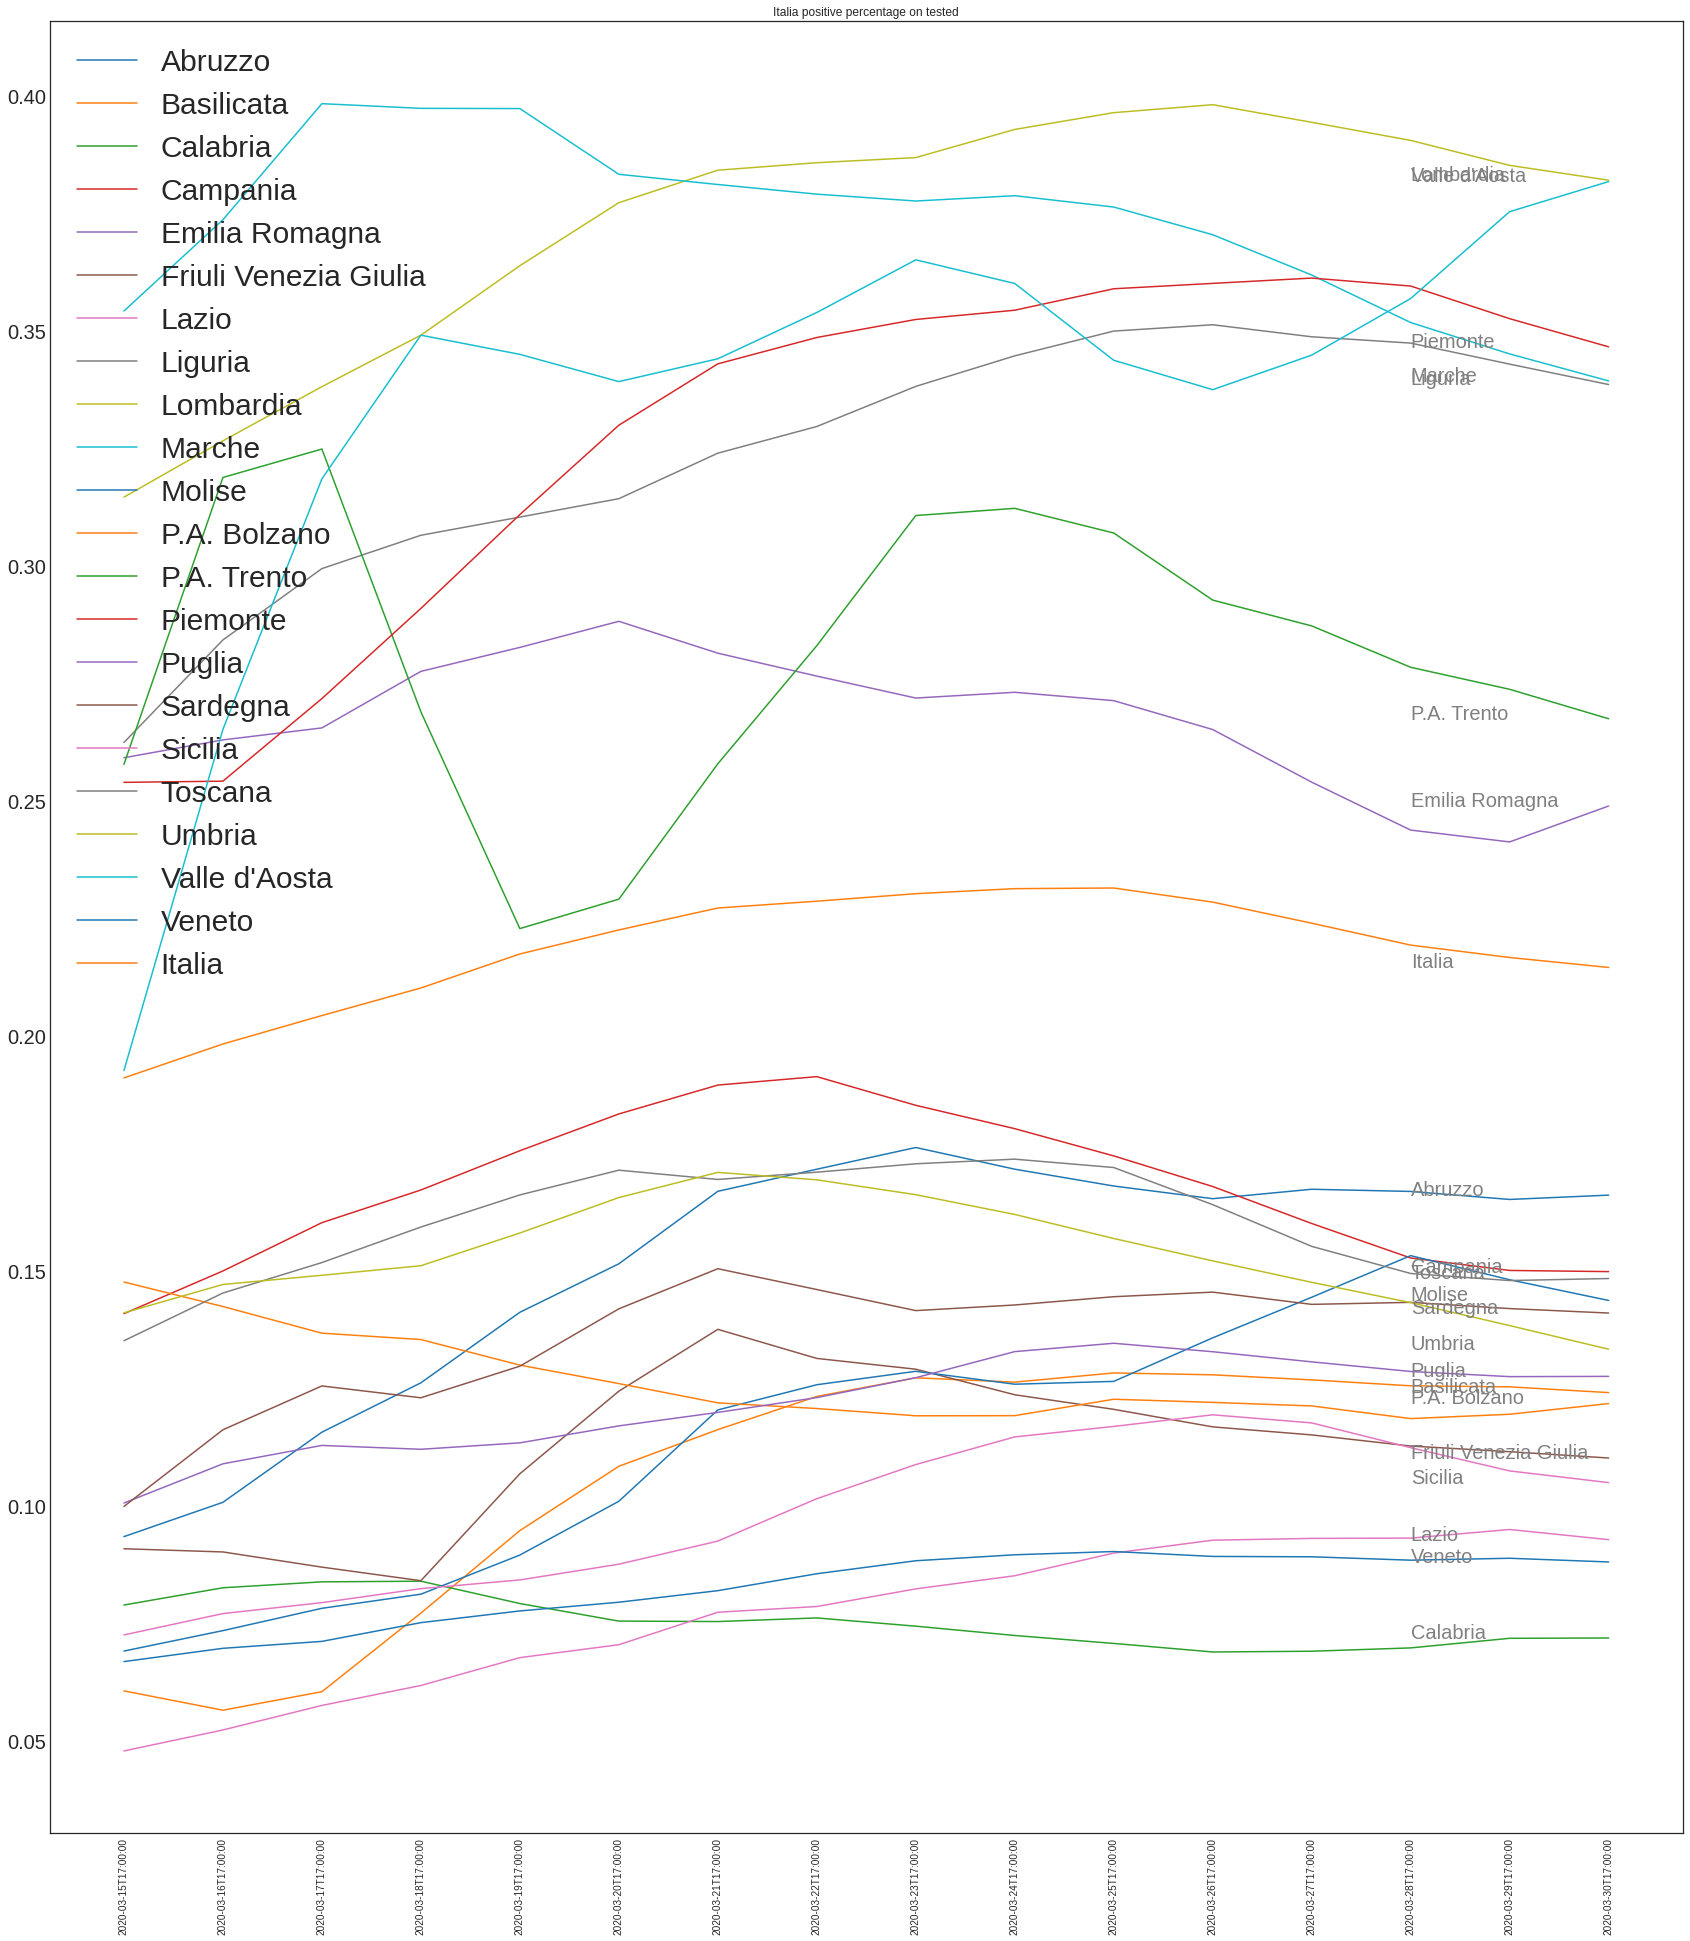

In [26]:
style = dict(size=20, color='gray')
columns = list(italy_tested)
last_day = covid['date'].max()
f = plt.figure(figsize=(60,80))
f.subplots_adjust(hspace=0.4, wspace=0.05)
ax = f.add_subplot(2, 2, 1)
for region in columns: 
    region_positive_vs_tested = italy_total_positive[[region]]/italy_tested[[region]]
    region_positive_vs_tested = region_positive_vs_tested[18:]
    #region_positive_vs_tested.columns = ['Positive']
    ax.plot(region_positive_vs_tested.index, region_positive_vs_tested.rolling(window=3).mean(), label=region)
    ax.text(15, region_positive_vs_tested.rolling(window=3).mean().loc[last_day], region, **style)

ax.set_title(region + ' positive percentage on tested')
ax.set_xticklabels(region_positive_vs_tested.index,rotation=90)
ax.yaxis.set_tick_params(labelsize=20)
ax.set_yscale('linear')
plt.legend(loc="upper left", prop={'size': 30})

L'esecuzione del tampone è mirata, ossia viene effettuata tendenzialmente a chi presenta sintomi sospetti però è curioso come si passi da percentuali del 10% al 40%. Le regioni a tasso più alto sono quelle dove l'epidemia si è sviluppata prima e che hanno beneficiato forse tardivamente del lockdown.